In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
data = pd.read_csv("nogi_data.csv")
data.head()

,name,birthday,single,date,age,selected,row,kanbaibusuu,preparebusuu,speed,kanbai,rest,term,belong,shodou
0,manatsu,1993/8/20,1,2012/2/22,18,.,.,.,.,.,.,1,1,1,136309
1,manatsu,1993/8/20,2,2012/5/2,18,.,.,.,.,.,.,1,1,1,155677
2,manatsu,1993/8/20,3,2012/8/22,19,.,.,.,.,.,.,1,1,1,186613
3,manatsu,1993/8/20,4,2012/12/19,19,1,2,7,11,0,0,0,1,1,232961
4,manatsu,1993/8/20,5,2013/3/13,19,1,2,8,18,0,0,0,1,1,242053


## 人口動態を見る

所属しているメンバーの年齢構成を見る

/Users/susu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/susu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


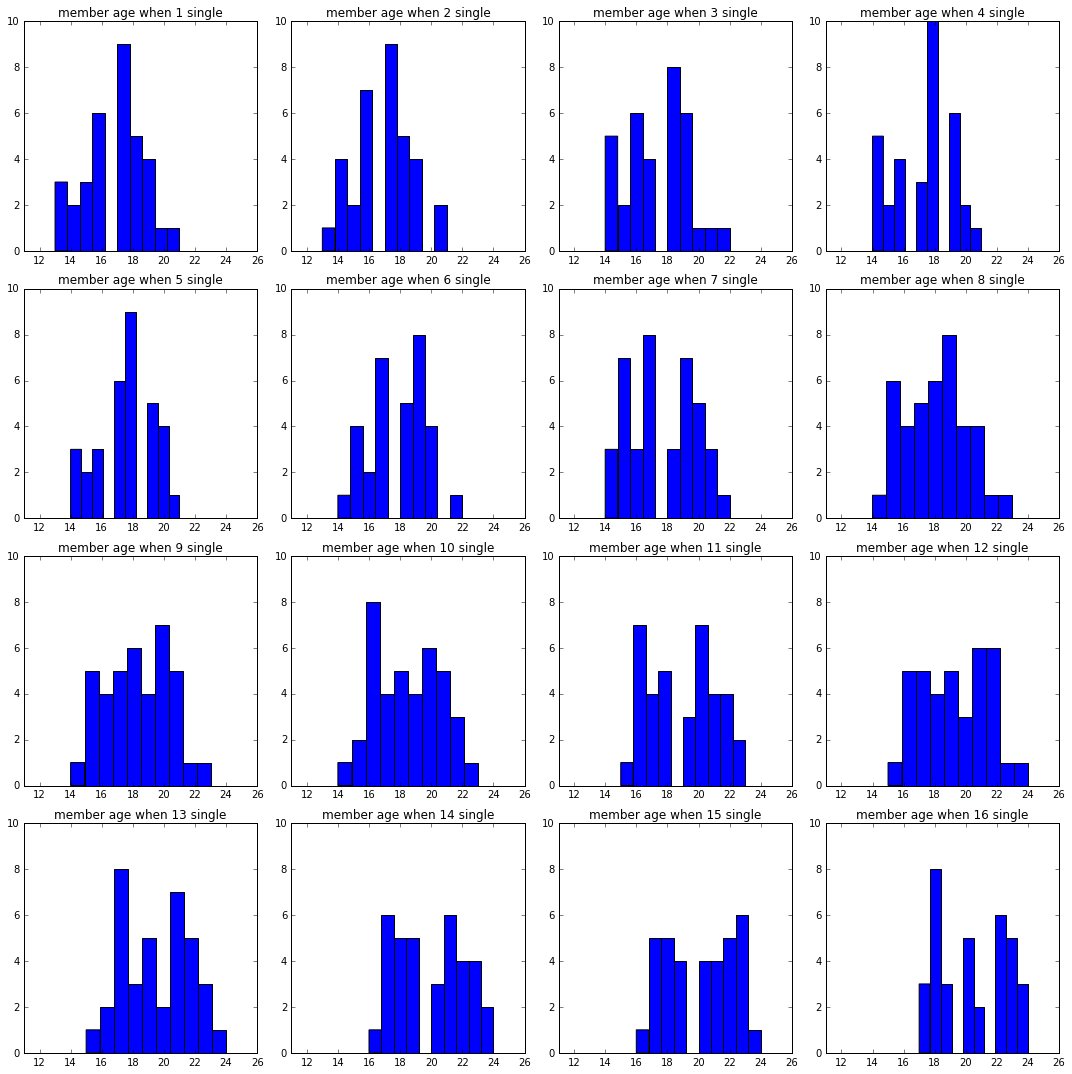

In [52]:
data[data.single == 10][data.belong == 1]
ages = {}
for i in range(16):
    ages[i+1] = data[data.single == i+1][data.belong == 1].age.values

f,a = plt.subplots(4,4,figsize=(15,15))
a = a.ravel()

for idx, ax  in enumerate(a):
    ax.hist(ages[idx+1])
    ax.set_title("member age when %s single" %(idx+1))
    ax.set_xlim([11, 26])
    ax.set_ylim([0,10])
plt.tight_layout()

3期生所属後、どのメンバーも26歳になったら抜けていると仮定して、6年後まで1年ごとに年齢構成を見る

In [56]:
age_16 = data[data.single == 16][data.belong == 1].age.values
age_3rd = data[data.term == 3][data.single == 16].age.values
age_all = np.r_[age_16,age_3rd]

/Users/susu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/susu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


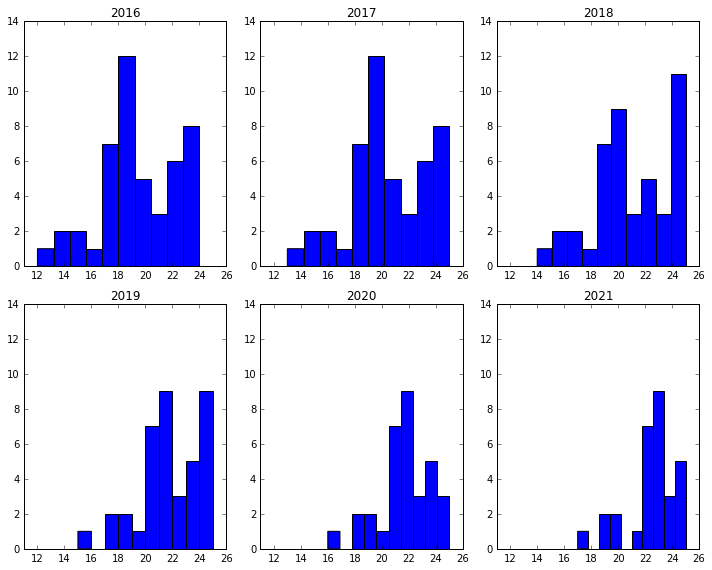

In [78]:
ages = np.ones((6, len(age_all)))
ages[0,:] = age_all
for i in range(5):
    ages[i+1, :] = ages[i, :] + 1
    
f,a = plt.subplots(2,3,figsize=(10,8))
a = a.ravel()
years = [2016, 2017, 2018, 2019, 2020, 2021]

for idx, ax  in enumerate(a):
    ax.hist(ages[idx, :][ages[idx, :]<26])
    ax.set_title("%s" %years[idx])
    ax.set_xlim([11, 26])
    ax.set_ylim([0,14])
plt.tight_layout()

上のヒストグラムは各年度末における年齢である。現在24手前と20手前に山がある。

年齢がいくにつれ止めやすくなることも考慮して、2017年度と2018年度で現在の24手前の山が消滅すると予想される。

ここで22手前に来た現在の20手まえの山がメインになる。

ここから育成を始めるのは大変。できるなら24手前の山が存在するうちに第3の山を作っておきたい。第3の山はさらに若く現在16手前の山となるのが望ましい。

このサイクルを維持すれば継続できるのでは？

つまり、

状態1：16手前の山、20手前の山、24手前の山が存在。16の山を育成しつつ、お姉さんチームは徐々に引退

状態2：18手前の山、22手前の山が存在

の状態を繰り返せばよく、状態2になってから約1,2年後に16手前をターゲットにしたオーディションを開催して新しい山を作り状態1に移行すればいい。
(現在の状態を見る限り、16手前の山を作れていない。近い将来これを解消するためのオーディションが行われることが予想される？)

それ以降状態1と2の遷移モードに入ったら、オーディションは、約3年感覚で行われることが予想される。

一つ前のヒストグラムを見てもわかるが、やはり7枚目で2期生を入れたことで二つ目の山が発生している。（それまでは明らかに単峰）

3期生はまだその二つ目の山を補強することしかできてない。→しかし運営としては三つ目の山を作りに行ったはず

要するにオーディションにおいては16歳手前の山を作れるほどの人材がその年代から来ていなかったことが予想される。

なぜか

16手前はまだ中学生。都市間の移動や上京などはかなりリスキーだし、親からの賛同も得にくい。→一部の例外を除いて地方勢を獲得できない（地元のグループに所属してしまう。）

必然的にオーディション参加人数は限られてきて、この年代の人材にリーチできなくなる。

結果として、三つ目の山を作ることはできず、2つの山では人材育成に失敗する可能性が高いため（逸材が入らないと前世代の人気に勝てない）、代替わりができない。

こうしてグループが消滅する。グループの消滅は人材確保の困難性から生ずる構造的な問題。

### じゃあどうするか

一つは地方に練習所などを作って、16手前の人材に無理やりにでもアクセスする。

もう一つは30手前ぐらいまで寿命を延ばし、20手前、24手前、28手前の3つの山にする。

乃木坂のようなvisual重視であれば後者が良い？（28で止めてもまだ食っていけるやつだけを入れる）

以上より、運営の方針により今のお姉さん方はまだまだ卒業しないと予想。